<a href="https://colab.research.google.com/github/Rakshithadhandre/Machine_Learning_Models/blob/main/KNN_Algo_SUV_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

**Reading the dataset**

In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [3]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


**Feature Engineering**

In [4]:
df=df.drop(['User ID','Gender'],axis =1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


**Loading** **data**

In [6]:
#method1-loading the data into training and testing
X=df.iloc[:,:-1].values #iloc-index location of 2D array
Y=df.iloc[:,-1:].values #converted into 2D array

**`Splitting the data `**

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)#20%-testing 80%-training

**Normalizing the data- Standard Scaler**

In [8]:
#Normalizing the data-Standard Scalar
#bringing all the values of the different columns in dataset into one particular scale or range to avoid misunderstandings by the model during training phase 
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)  #normalization
X_test=sst.transform(X_test)

**Build** **Model**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=20) #stores the classifier by calling the classifier

**Training - Fitting data**

In [13]:
#Training
knn_clf.fit(X_train,Y_train) #fit the model with data 

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

**Testing Model**

In [14]:
y_pred=knn_clf.predict(X_test)

In [15]:
print("Predicted value for training data",knn_clf.score(X_train,Y_train))
print("predicted value for testing data",knn_clf.score(X_test,Y_test))
print("Overall Accuracy:",knn_clf.score(sst.transform(X),Y))

Predicted value for training data 0.903125
predicted value for testing data 0.95
Overall Accuracy: 0.9125


**Cross validation to find the best k value and make trials**

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

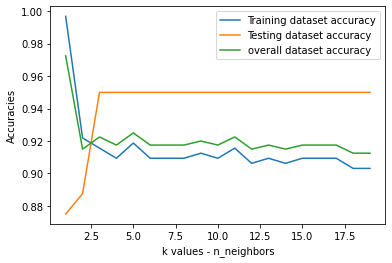

In [32]:
neighbors=np.arange(1,20) #creates an array contains the array range 1 to 20

#as to keep a track of each k values we 2 empty arrays i.e train_accuracy and test_accuracy
train_accuracy = np.empty(len(neighbors))#len of array= len of neighbors
test_accuracy = np.empty(len(neighbors))
overall_accuracy = np.empty(len(neighbors))

#Loop over K values
for i,k in enumerate(neighbors): 
 knn=KNeighborsClassifier(n_neighbors=k)  #calling classifiers with parameters
 knn.fit(X_train,Y_train)  #fitting the data

   #compute the training accuracy of ML model
 train_accuracy[i] = knn.score(X_train,Y_train) #additional i is used to keep track of indexes and store the values of accuracy at appropriate place so that we can see at what k value we got good accuracy.
 test_accuracy[i] = knn.score(X_test,Y_test)

#Overall score
 overall_accuracy[i] = knn.score(sst.transform(X),Y)

 import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='overall dataset accuracy')
plt.legend() 
plt.xlabel('k values - n_neighbors')
plt.ylabel('Accuracies')
plt.show()

